In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats

ModuleNotFoundError: No module named 'scipy'

2. What is the average age of the players?

In [100]:
match_away_team_df=pd.read_csv('MatchAwayTeamInfo.csv')
match_home_team_df=pd.read_csv('MatchHomeTeamInfo.csv')
height_player_mean=pd.concat([match_away_team_df.height,match_home_team_df.height]).mean()

4. What is the longest match recorded in terms of duration?

In [90]:
match_time_df=pd.read_csv('MatchTimeInfo.csv')
match_time_df.head()
match_time_df.fillna(0,inplace=True)
match_time_df.drop_duplicates(inplace=True)

In [91]:

match_time_df['sumation_time_periods_match']=match_time_df.iloc[:,[1,2,3,4,5]].sum(axis=1)
match_time_df.head()

,match_id,period_1,period_2,period_3,period_4,period_5,current_period_start_timestamp,sumation_time_periods_match
0,12260075,3463.0,3855.0,0.0,0.0,0.0,1.714511e+09,7318.0
1,12260076,3032.0,2121.0,2674.0,0.0,0.0,1.714492e+09,7827.0
2,12260077,2747.0,3525.0,4074.0,0.0,0.0,1.714492e+09,10346.0
3,12260078,2519.0,2531.0,2121.0,0.0,0.0,1.714578e+09,7171.0
4,12260080,2616.0,2766.0,0.0,0.0,0.0,1.714483e+09,5382.0


In [92]:
longest_time=match_time_df['sumation_time_periods_match'].max()
longest_match=match_time_df.loc[(match_time_df['sumation_time_periods_match']==longest_time),:]
longest_match

,match_id,period_1,period_2,period_3,period_4,period_5,current_period_start_timestamp,sumation_time_periods_match
13350,12346747,167761.0,3392.0,0.0,0.0,0.0,1.716382e+09,171153.0


6. Which country has produced the most successful tennis players?

In [93]:
a=pd.concat([match_away_team_df[['full_name','country','current_rank']],match_home_team_df[['full_name','country','current_rank']]])
a.sort_values('current_rank').drop_duplicates().dropna().iloc[0:19,:]

,full_name,country,current_rank
13359,"Swiatek, Iga",Poland,1.0
11242,"Djokovic, Novak",Serbia,1.0
11529,"Sabalenka, Aryna",Belarus,2.0
11035,"Sinner, Jannik",Italy,2.0
6170,"Gauff, Cori",USA,3.0
10767,"Alcaraz, Carlos",Spain,3.0
4,"Zverev, Alexander",Germany,4.0
499,"Rybakina, Elena",Kazakhstan,4.0
4589,"Medvedev, Daniil",Russia,4.0
4115,"Zverev, Alexander",Germany,5.0


In [94]:
a=pd.concat([match_away_team_df[['full_name','country','total_prize']],match_home_team_df[['full_name','country','total_prize']]])
a.sort_values('total_prize',ascending=False).drop_duplicates().iloc[0:19,:]

,full_name,country,total_prize
14368,"Djokovic, Novak",Serbia,151703255.0
11242,"Djokovic, Novak",Serbia,151675883.0
4844,"Djokovic, Novak",Serbia,151629548.0
10733,"Nadal, Rafael",Spain,112340134.0
4578,"Nadal, Rafael",Spain,112313000.0
10710,"Murray, Andy",United Kingdom,53781808.0
7104,"Murray, Andy",United Kingdom,53778542.0
7090,"Zverev, Alexander",Germany,34897595.0
5599,"Zverev, Alexander",Germany,34020353.0
12081,"Medvedev, Daniil",Russia,33950097.0


8. Is there a difference in the number of double faults based on gender?

10. Is there a correlation between a player's height and their ranking?

In [148]:
match_home_team_height_rank_df=match_home_team_df.iloc[:,[17,7,14]]
match_away_team_height_rank_df=match_away_team_df.iloc[:,[17,7,14]]
match_away_team_height_rank_df
height_rank_player=pd.concat([match_home_team_height_rank_df,match_away_team_height_rank_df])
height_rank_player.drop_duplicates()
height_rank_player.dropna()
height_rank_player.drop('full_name',inplace=True, axis=1)
height_rank_player.head()

,height,current_rank
0,1.85,276.0
1,1.88,2.0
2,1.93,39.0
3,1.88,6.0
4,1.85,23.0


In [96]:
mann_whitney u test

SyntaxError: invalid syntax (1875049097.py, line 1)

12. What is the average number of games per set in men's matches compared to women's matches?

In [147]:
power_info_df=pd.read_csv('PowerInfo.csv')
set_game_powerinfo=power_info_df.iloc[:,[0,1,2]]
set_game_count=set_game_powerinfo.groupby(['match_id','set_num']).count()
set_game_count.drop_duplicates().head()


game_num
match_id set_num          
12260075 1              12
         2              10
12260076 2               9
12260077 2              13
12260078 1              20

In [146]:
gender_match_away=match_away_team_df[['match_id','gender']]
gender_match_home=match_home_team_df[['match_id','gender']]
gender_match_id=pd.concat([gender_match_away,gender_match_home])
gender_match_id.drop_duplicates().head()

,match_id,gender
0,12260075,M
1,12260076,M
2,12260077,M
3,12260078,M
4,12260080,M


In [145]:
gender_games_no=pd.merge(set_game_count,gender_match_id,on='match_id')
gender_games_no.head()

,match_id,game_num,gender
0,12260075,12,M
1,12260075,12,M
2,12260075,10,M
3,12260075,10,M
4,12260076,12,M


In [144]:
gender_games_no.drop(columns='match_id', inplace=True)
mean_gender_games_no=gender_games_no.groupby(['gender']).mean()

,game_num
gender,
F,18.203035
M,19.042719


14. What is the most common type of surface used in tournaments?

In [42]:
match_tournament=pd.read_csv('MatchTournamentInfo.csv')
match_tournament.drop_duplicates(inplace=True)
ground_type_match=match_tournament[['ground_type','match_id']].groupby(['ground_type']).count()
ground_type_match.rename(columns={'match_id': 'number'},inplace=True)
ground_type_match

,number
ground_type,
Hardcourt indoor,241
Hardcourt outdoor,4606
Red clay,14238
Synthetic outdoor,93


array([[<Axes: title={'center': 'number'}>]], dtype=object)

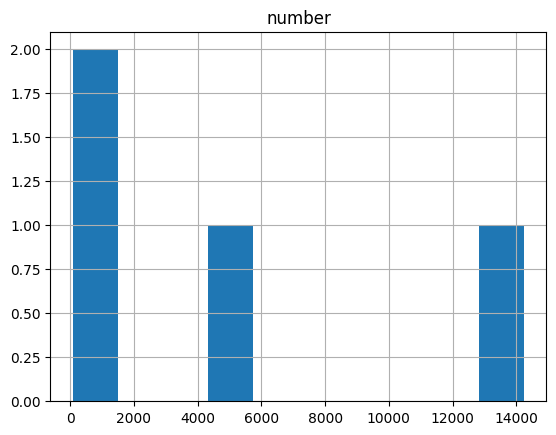

In [53]:
sns.histplot(data['ground_type_match'],kde=True)
plt.title('histogram of  match ground_type ')
plt.xlabel('ground type')
plt.ylabel('number of ground type ')

